In [13]:
# 삼성전자 가격 예측. 회귀분석 이용해보기
# 지도학습!
# ARIMA 시계열 데이터 분석을 통해 저가 예측해보기.
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

<AxesSubplot:xlabel='Date'>

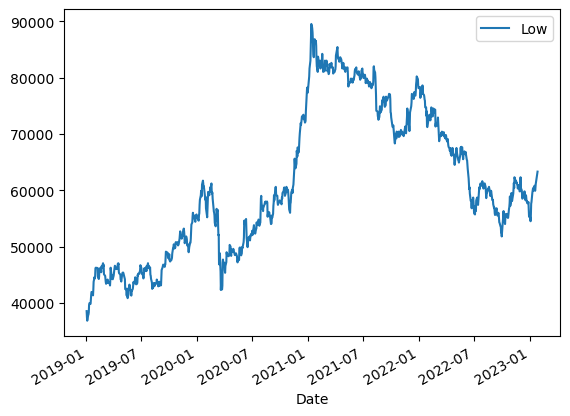

In [14]:
# 데이터 확인 절차. csv 파일 불러오고 데이터 가공.
# Plot the time series and see its pattern.
stock = pd.read_csv('Samsung Electronics Stock Price.csv')
# 해당 csv 파일에서 쓰지 않을 나머지 열 제거.
stock = stock.drop(['Open', 'High', 'Close', 'Adj Close', 'Volume'], axis=1)
# 날짜 인덱스화 하고 오름차순으로 정렬
stock['Date']=pd.to_datetime(stock['Date'])
stock.set_index('Date', inplace=True)
stock.plot()

In [16]:
# ARIMA모델의 p, d, q값 알아보기.
# 일단 d값을 알아보기 위해 차분해보기.
# 차분 후 발생하는 결측값에 대비, dropna 사용.
# 차분 후 p_value 확인을 위해 adfuller 사용.
stock_d0 = stock_train['Low']
stock_adf = adfuller(stock_d0.dropna())
print("p-value:{}".format(stock_adf[1]))

p-value:0.44064132964322195


In [17]:
# 1차 차분 후 p-value 살펴보기
stock_diff = stock_d0.diff().dropna()
stock_adf1 = adfuller(stock_diff)
print("p-value:{}".format(stock_adf1[1]))

p-value:2.3395373452235567e-16


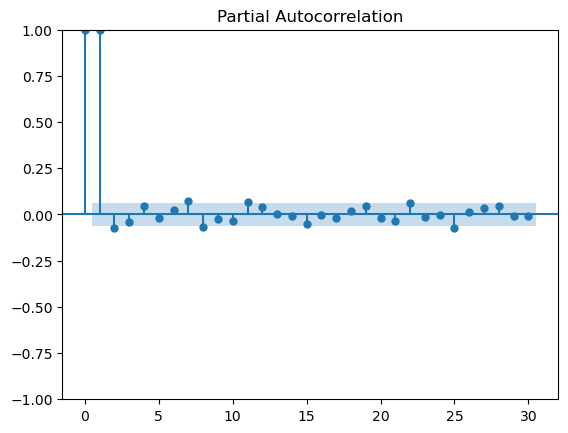

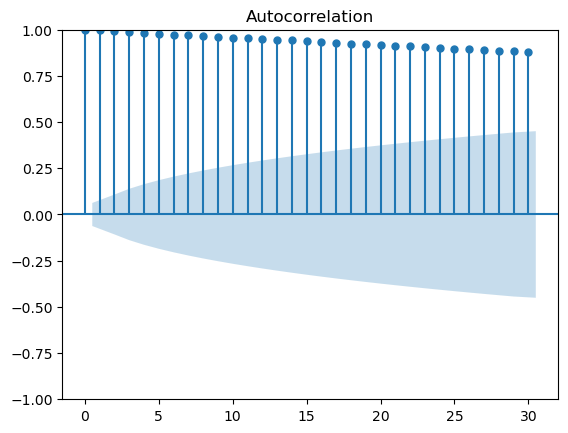

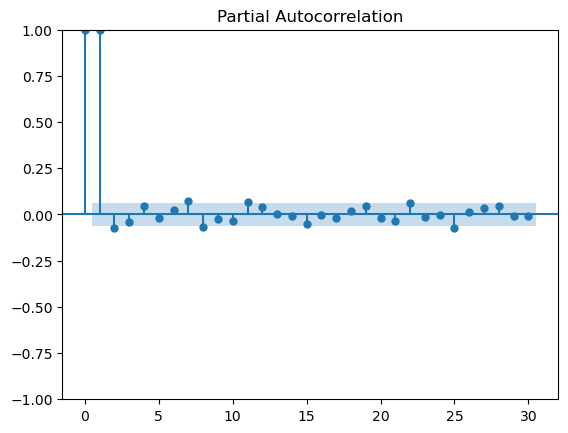

In [19]:
# 1차 차분 후 p-value 값이 급격히 감소. -> d=1.
# 원래 데이터의 ACF, PACF 도표 확인 하여 p, q값 판단.
plot_acf(stock_d0)
plot_pacf(stock_d0)

In [53]:
# 해당 ACF, PACF를 통해 데이터가 AR성향을 띰을 확인.
# 원래 데이터의 PACF lag2 이후 급감하므로 p=1, q=1로 고려.
# p=1, d=1, q=1로 하여 ARIMA 모델 적용하기.
model = ARIMA(stock['Low'], order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                    Low   No. Observations:                 1003
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -8245.208
Date:                Wed, 08 Feb 2023   AIC                          16496.416
Time:                        14:58:01   BIC                          16511.145
Sample:                             0   HQIC                         16502.013
                               - 1003                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2872      0.570      0.504      0.614      -0.830       1.404
ma.L1         -0.2514      0.575     -0.438      0.662      -1.378       0.875
sigma2      8.201e+05      2e+04     41.102      0.0

c:\Users\jinw0\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\jinw0\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\jinw0\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [54]:
# p > abs(z) 값이 0.5가 넘어가서 AR, MR을 나타내는 p, q에 1을 할당하는 부적합함을 알 수 있었음.
# p, q 값을 2로 조정, 모델 다시 구축.
model = ARIMA(stock['Low'], order=(2,1,2))
model_fit = model.fit()
print(model_fit.summary())

c:\Users\jinw0\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\jinw0\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\jinw0\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                    Low   No. Observations:                 1003
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -8241.716
Date:                Wed, 08 Feb 2023   AIC                          16493.432
Time:                        14:59:42   BIC                          16517.980
Sample:                             0   HQIC                         16502.761
                               - 1003                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.5874      0.022    -71.349      0.000      -1.631      -1.544
ar.L2         -0.9539      0.022    -43.137      0.000      -0.997      -0.911
ma.L1          1.5972      0.018     87.308      0.0

c:\Users\jinw0\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<AxesSubplot:xlabel='Date'>

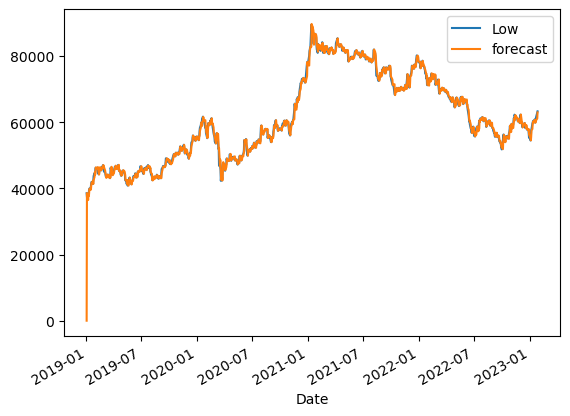

In [55]:
# p > abs(z) 값 확인 결과 좋은 p, q에 2를 할당한 것이 적합함을 알 수 있음.
# 이를 통해 예측값과 실제 값을 비교.
stock['forecast']=model_fit.predict()
stock[['Low', 'forecast']].plot()

In [59]:
# forecast의 앞 부분이 왜 저렇게 그려졌는지는 모르겠지만,
# 전체적으로 Low와 forecast가 비슷한 추이를 보임.
# 이제 앞으로의 값 예측해보기. 2월 7일의 가격 예측해보고, 실제와 비교해보자.
forecast_result = model_fit.forecast(steps=15)
print(forecast_result)

1003    63358.223557
1004    63300.174895
1005    63336.779746
1006    63334.048204
1007    63303.465152
1008    63354.618789
1009    63302.591569
1010    63336.382252
1011    63332.373809
1012    63306.502294
1013    63351.394880
1014    63304.811962
1015    63335.933017
1016    63330.968790
1017    63309.161185
1018    63348.514442
1019    63306.847958
1020    63335.448842
1021    63329.795140
1022    63311.486128
1023    63345.943402
1024    63308.711380
1025    63334.943462
1026    63328.819777
1027    63313.516537
1028    63343.650754
1029    63310.413852
1030    63334.428008
1031    63328.013946
1032    63315.287440
1033    63341.608324
1034    63311.966679
1035    63333.911405
1036    63327.352691
1037    63316.829936
1038    63339.790551
1039    63313.380771
1040    63333.400720
1041    63326.814387
1042    63318.171612
1043    63338.174272
1044    63314.666581
1045    63332.901457
1046    63326.380326
1047    63319.336916
1048    63336.738527
1049    63315.834059
1050    63332

c:\Users\jinw0\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [ ]:
# 약 63310원으로 예측되었고, 실제로 